In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
from keras import backend as K

/home/guilhermino/anaconda3/envs/fastai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [5]:
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_test_samples = 2400
nb_train_samples = 7968
nb_validation_samples = 1632
epochs = 20
batch_size = 364
num_classes = 12

names = [
    'carrot_cake', 'chocolate_cake', 'cup_cakes', 'french_fries','garlic_bread','hamburger',
    'hot_dog','ice_cream','lasagna','omelette','pizza','spaghetti_bolognese']

In [6]:
PATH = os.getcwd()
# Define data path
test_dir = PATH + '/data/test'
train_dir = PATH + '/data/train'
valid_dir = PATH + '/data/validation'

test_dir_list = os.listdir(test_dir)
test_dir_list.sort()
train_dir_list = os.listdir(train_dir)
train_dir_list.sort()
valid_dir_list = os.listdir(valid_dir)
valid_dir_list.sort()

In [7]:
test_x_list = []
train_x_list = []
valid_x_list = []

In [8]:
for dataset in test_dir_list:
    img_list = os.listdir(test_dir +'/'+ dataset)
    print(dataset)
    for img in img_list:
        image = cv2.imread(test_dir + '/'+ dataset + '/'+ img )
        image = cv2.resize(image, (150, 150))
        test_x_list.append(image)

carrot_cake
chocolate_cake
cup_cakes
french_fries
garlic_bread
hamburger
hot_dog
ice_cream
lasagna
omelette
pizza
spaghetti_bolognese


In [9]:
for dataset in train_dir_list:
    img_list = os.listdir(train_dir +'/'+ dataset)
    print(dataset)
    for img in img_list:
        image = cv2.imread(train_dir + '/'+ dataset + '/'+ img )
        image = cv2.resize(image, (150, 150))
        train_x_list.append(image)

carrot_cake
chocolate_cake
cup_cakes
french_fries
garlic_bread
hamburger
hot_dog
ice_cream
lasagna
omelette
pizza
spaghetti_bolognese


In [10]:
for dataset in valid_dir_list:
    img_list = os.listdir(valid_dir +'/'+ dataset)
    print(dataset)
    for img in img_list:
        image = cv2.imread(valid_dir + '/'+ dataset + '/'+ img )
        image = cv2.resize(image, (150, 150))
        valid_x_list.append(image)

carrot_cake
chocolate_cake
cup_cakes
french_fries
garlic_bread
hamburger
hot_dog
ice_cream
lasagna
omelette
pizza
spaghetti_bolognese


In [11]:
test_x = np.array(test_x_list)
test_x = test_x.astype('float32')
test_x = test_x / 255.
print (test_x.shape)

(2400, 150, 150, 3)


In [12]:
train_x = np.array(train_x_list)
train_x = train_x.astype('float32')
train_x = train_x / 255.
print (train_x.shape)

(7968, 150, 150, 3)


In [13]:
valid_x = np.array(valid_x_list)
valid_x = valid_x.astype('float32')
valid_x = valid_x / 255.
print (valid_x.shape)

(1632, 150, 150, 3)


In [14]:
labels = np.ones((nb_test_samples,),dtype='int64')

labels[0:200]=0
labels[200:400]=1
labels[400:600]=2
labels[600:800]=3
labels[800:1000]=4
labels[1000:1200]=5
labels[1200:1400]=6
labels[1400:1600]=7
labels[1600:1800]=8
labels[1800:2000]=9
labels[2000:2200]=10
labels[2200:]=11

test_label = np_utils.to_categorical(labels, num_classes)

In [15]:
labels = np.ones((nb_train_samples,),dtype='int64')

labels[0:664]=0
labels[664:1328]=1
labels[1328:1992]=2
labels[1992:2656]=3
labels[2656:3320]=4
labels[3320:3984]=5
labels[3984:4648]=6
labels[4648:5312]=7
labels[5312:5976]=8
labels[5976:6640]=9
labels[6640:7304]=10
labels[7304:]=11

train_label = np_utils.to_categorical(labels, num_classes)

In [16]:
labels = np.ones((nb_validation_samples,),dtype='int64')

labels[0:136]=0
labels[132:272]=1
labels[272:408]=2
labels[408:544]=3
labels[544:680]=4
labels[680:816]=5
labels[816:952]=6
labels[952:1088]=7
labels[1088:1224]=8
labels[1224:1360]=9
labels[1360:1496]=10
labels[1496:]=11

valid_label = np_utils.to_categorical(labels, num_classes)

In [16]:
valid_label

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [17]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, 150, 150)
else:
    input_shape = (150, 150, 3)

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [103]:
# Esta é a configuração de aumento que usaremos para treinamento
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [106]:
# Esta é a configuração de aumento que usaremos para testar:
# somente reescalonamento
validation_datagen = ImageDataGenerator(rescale=1. / 255)

In [105]:
train_generator = train_datagen.fit(train_x)

In [108]:
validation_generator = validation_datagen.fit(valid_x)

In [21]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(train_x)

In [22]:
h = model.fit_generator(datagen.flow(train_x, train_label,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(valid_x, valid_label),workers=12)


Epoch 1/20
22/22 [==============================] - 247s 11s/step - loss: 0.4395 - acc: 0.8542 - val_loss: 0.3062 - val_acc: 0.9167
Epoch 2/20
22/22 [==============================] - 235s 11s/step - loss: 0.3611 - acc: 0.8992 - val_loss: 0.2938 - val_acc: 0.9167
Epoch 3/20
22/22 [==============================] - 231s 10s/step - loss: 0.3441 - acc: 0.9051 - val_loss: 0.2848 - val_acc: 0.9167
Epoch 4/20
22/22 [==============================] - 229s 10s/step - loss: 0.3311 - acc: 0.9086 - val_loss: 0.2735 - val_acc: 0.9167
Epoch 5/20
22/22 [==============================] - 231s 10s/step - loss: 0.3227 - acc: 0.9110 - val_loss: 0.2813 - val_acc: 0.9167
Epoch 6/20
22/22 [==============================] - 229s 10s/step - loss: 0.3139 - acc: 0.9127 - val_loss: 0.2850 - val_acc: 0.9167
Epoch 7/20
22/22 [==============================] - 226s 10s/step - loss: 0.3032 - acc: 0.9136 - val_loss: 0.2738 - val_acc: 0.9167
Epoch 8/20
22/22 [==============================] - 224s 10s/step - loss: 0.

In [23]:
print(h.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [24]:
test_eval = model.evaluate(test_x, test_label, verbose=0)

In [25]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.24556380033493042
Test accuracy: 0.9197222407658895


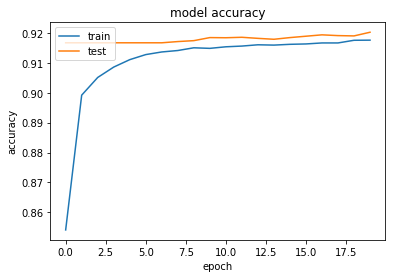

In [26]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

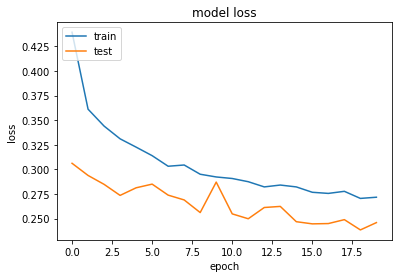

In [27]:
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
model.save_weights('food.h5')

ImportError: `save_weights` requires h5py.

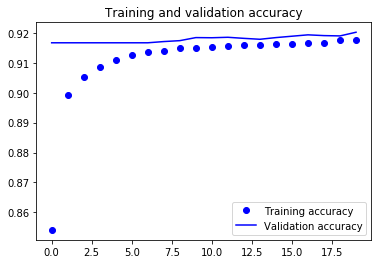

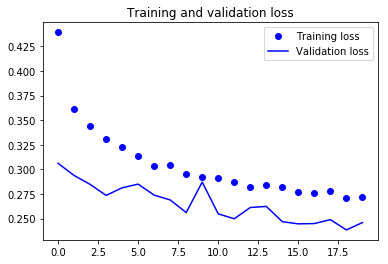

In [28]:
accuracy = h.history['acc']
val_accuracy = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
predicted_classes = model.predict(test_x)

In [30]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [32]:
predicted_classes.shape, test_label.shape

((2400,), (2400, 12))

In [35]:
correct = np.where(predicted_classes==test_label)[0]
print("Found %d correct labels" % len(correct))

Found 0 correct labels


/home/guilhermino/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [36]:
correct

array([], dtype=int64)

In [38]:
predicted_classes[0]

0

In [40]:
test_label[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])